# 4 Dataset Classification

In [3]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
import math 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
#plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False



In [4]:
#Importing the dataset
data=pd.read_csv('star.txt',sep='\s+')

In [6]:
data.head()

,#ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720


In [7]:
#Excluding the target and the #ID 
notar=data.drop(columns=['Sharp','#ID'])

# P.C.A. Excluding Space

In [6]:
#Excluding the target, the #ID and the spatial coordinates in order to apply the P.C.A.
notar=data.drop(columns=['Sharp','#ID','X','Y'])

In [9]:
notar.head()

,F606W,error,F814W,error.1,Chi
0,28.197,0.1036,27.127,0.1068,6.106
1,20.843,0.0552,19.815,0.0661,10.690
2,27.014,0.2194,26.068,0.1349,10.651
3,30.193,0.3641,28.270,0.1636,4.059
4,28.935,0.1669,28.941,0.2464,4.274


In [7]:
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [8]:
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [57]:
#Stacking the X and Y coordinates 
pca_data['X']=data.X
pca_data['Y']=data.Y

In [58]:
#And the Sharp
pca_data['Sharp']=data.Sharp

In [59]:
pca_data.head()

,FirstComponent,SecondComponent,ThirdComponent,X,Y,Sharp
0,-3.348246,3.558359,0.052565,4462.947,140.859,0.7310
1,6.885136,8.439184,0.189286,5002.486,186.138,0.4000
2,-1.896787,8.148357,0.145220,5003.574,195.421,0.1940
3,-5.504066,1.449171,-0.564914,4448.493,207.417,-1.9585
4,-5.110070,1.678896,0.804773,5040.717,224.366,-0.7720


In [60]:
#pca_data=pca_data.drop(columns=['Sharp'])

# Best method 3 feature 3 classes

In [12]:
#Considering three feature from the P.C.A. and three classes classification
opt_data=pca_data[['FirstComponent','SecondComponent','ThirdComponent']]
data['SharpSign']=data.Sharp.apply(np.sign)
opt_data['Target']=data['SharpSign']

In [183]:
#Target and data
X=opt_data.drop(columns=['Target'])
y=opt_data.Target

In [184]:
#Importing SVM and Model selection for train test split 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [185]:
#(Train+Validation)-Test with wide test set (90% of the data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=42)

In [186]:
#Train Validation split with 50% of values
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

In [187]:
#Computing the best kernel on the validation, training on the training set 
K_LIST=['linear', 'poly', 'rbf', 'sigmoid']

In [188]:
#Training and test validation varies 5 times in order to pick the best one 
BEST_KERNEL=[]
k=0
for i in range(5):
    FIN_SCORE=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.5, random_state=42)
    k=0
    for ker in K_LIST:
        clf=SVC(kernel=ker)
        clf.fit(X_train,y_train)
        fin_score=clf.score(X_val,y_val)
        FIN_SCORE.append(fin_score)
        k=k+1
        print(ker + ' Kernel has been explored')
    FIN_SCORE=np.array(FIN_SCORE)
    
    BEST_KERNEL.append(K_LIST[FIN_SCORE.argmax()])
    print('Cross validation ' + str(i) + ' out of 4 \n')

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 0 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 1 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 2 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 3 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 4 out of 4 



In [190]:
CV_DATA=pd.DataFrame({'CV Number':np.arange(1,6,1),'Choosen Kernel': BEST_KERNEL})

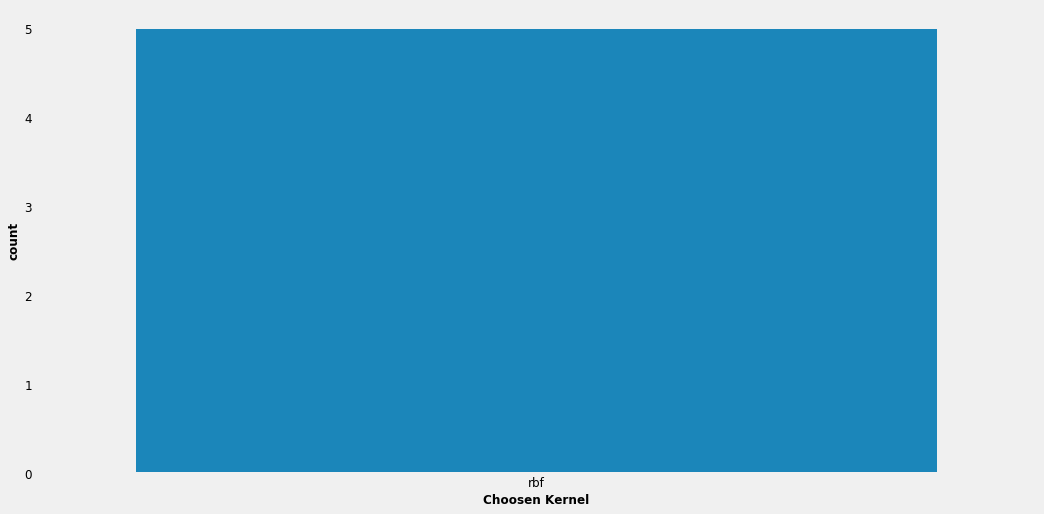

In [191]:
sns.countplot(CV_DATA['Choosen Kernel'])

In [192]:
best_kernel='rbf'

In [194]:
#The same form of validation is made for the C value 
c_list=np.arange(0.5,50.5,0.5)
k=0
PERC=['20%','40%','60%','80%','100%']
K=[20,40,60,80,100]
BEST_C=[]
for i in range(5):
    FIN_SCORE=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.5, random_state=42)
    k=0
    for c in c_list:
        k=k+1
        clf=SVC(C=c,kernel=best_kernel)
        clf.fit(X_train,y_train)
        fin_score=clf.score(X_val,y_val)
        FIN_SCORE.append(fin_score)
        #k=k+1
        if k in K:
            ind=K.index(k)
            print (PERC[ind] + ' of the C values has been explored')
    FIN_SCORE=np.array(FIN_SCORE)
    BEST_C.append(c_list[FIN_SCORE.argmax()])
    print('Cross validation ' + str(i) + ' out of 4 \n')

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 0 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 1 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 2 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 3 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80

Text(0, 0.5, 'Count')

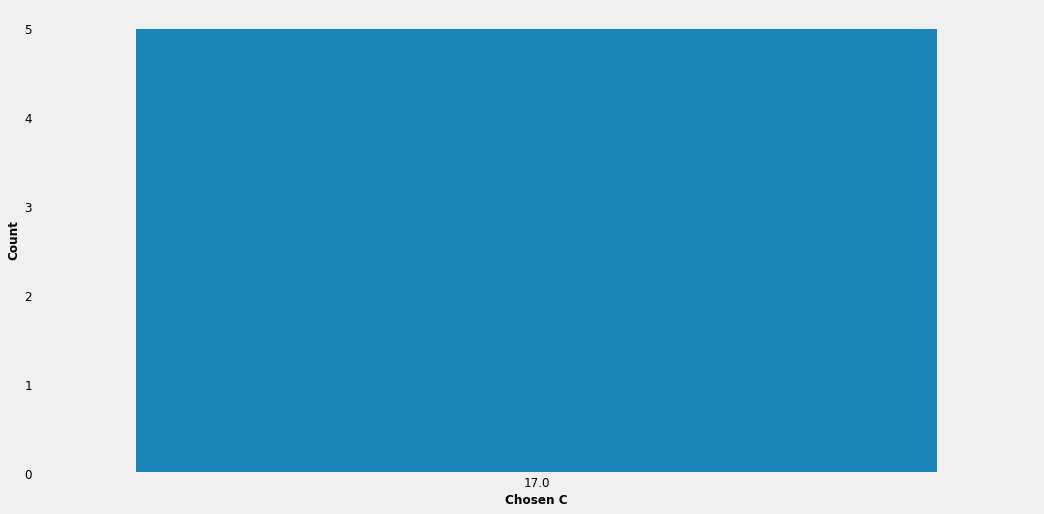

In [195]:
sns.countplot(BEST_C)
plt.xlabel('Chosen C')
plt.ylabel('Count')

In [196]:
FIN_SCORE=np.array(FIN_SCORE)

In [197]:
best_c=c_list[FIN_SCORE.argmax()]

In [14]:
best_c=17
best_kernel='rbf'

In [199]:
#Train-test split at 70% has been made, and the performance are computed 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42)

In [200]:
#Computing the score 
clf=SVC(kernel=best_kernel,C=best_c)
clf.fit(X_train,y_train)
fin_score=clf.score(X_test,y_test)

In [203]:
#The prediction
prediction=clf.predict(X_test)

In [204]:
print('The final score with 3 feature is ' + str(fin_score*100) +'% ')

The final score with 3 feature is 71.57564657564657% 


In [205]:
test_data=X_test.copy()
test_data['Target']=y_test
test_data['Prediction']=prediction

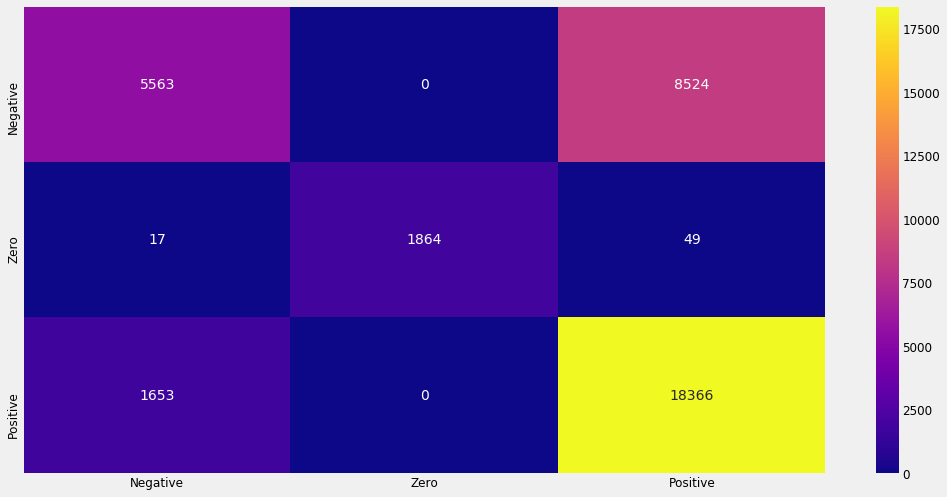

In [214]:
#And the confusion matrix
import itertools
from string import ascii_uppercase
from sklearn.metrics import confusion_matrix

y_test=test_data.Target
predic = prediction

columns = ['Negative','Zero','Positive']

confm = confusion_matrix(y_test, predic)
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='plasma',annot=True,fmt='g')

In [227]:
#Defining precision and recall on three classes classification 
def precision(confusion,clas):
    if clas=='Negative':
        TP=confusion[0][0]
        FN=confusion[1][0]+confusion[2][0]
        pres=TP/(TP+FN)
    if clas=='Positive':
        TP=confusion[2][2]
        FN=confusion[2][0]+confusion[2][1]
        pres=TP/(TP+FN)
    if clas=='Zero':
        TP=confusion[1][1]
        FN=confusion[1][0]+confusion[1][2]
        pres=TP/(TP+FN)
    return pres

In [235]:
def recal(confusion,clas):
    if clas=='Negative':
        TP=confusion[0][0]
        FP=confusion[0][1]+confusion[0][2]
        rec=TP/(TP+FP)
    if clas=='Positive':
        TP=confusion[2][2]
        FP=confusion[0][2]+confusion[1][2]
        rec=TP/(TP+FP)
    if clas=='Zero':
        TP=confusion[1][1]
        FP=confusion[0][1]+confusion[2][1]
        rec=TP/(TP+FP)
    return rec

In [236]:
precision(confm,'Negative'),precision(confm,'Positive'),precision(confm,'Zero')

(0.7691137840453477, 0.9174284429791698, 0.9658031088082901)

In [237]:
recal(confm,'Negative'),recal(confm,'Positive'),recal(confm,'Zero')

(0.3949031021509193, 0.6817625004640113, 1.0)

In [238]:
#Summary of the Precision and Recall for each classes function
def statistics(confusion):
    neg=[precision(confm,'Negative'),recal(confm,'Negative')]
    pos=[precision(confm,'Positive'),recal(confm,'Positive')]
    zero=[precision(confm,'Zero'),recal(confm,'Zero')]
    stats=pd.DataFrame({'Negative':neg,'Positive':pos,'Zero':zero})
    stats.index=['Precision','Recall']
    return stats

In [239]:
statistics(confm)

,Negative,Positive,Zero
Precision,0.769114,0.917428,0.965803
Recall,0.394903,0.681763,1.000000
